<a href="https://colab.research.google.com/github/afgomesdev/MachineLearning/blob/main/Introducao_a_Machine_Learning_e_Classificacao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    'unfinished': 'n_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,n_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {
    0:1,
    1:0
}
dados['finalizados'] = dados.n_finalizado.map(troca)
dados.tail()

,n_finalizado,horas_esperadas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


,n_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


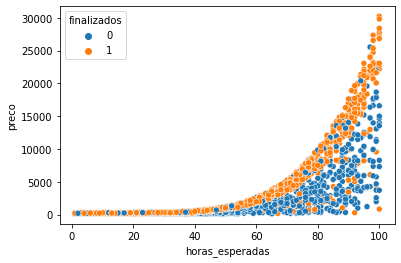

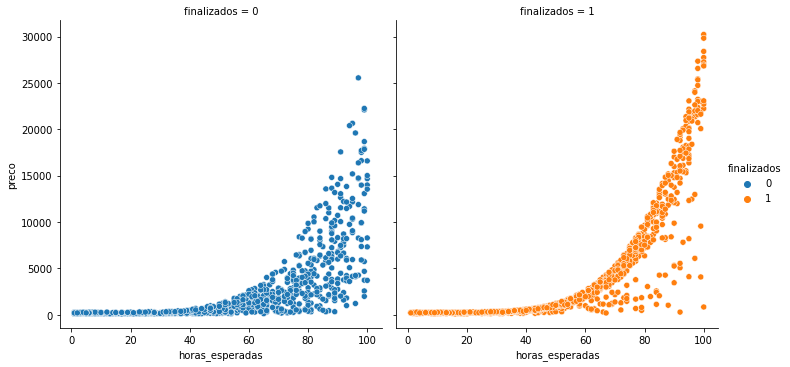

In [4]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue='finalizados', data=dados) 
sns.relplot(x="horas_esperadas", y="preco", hue="finalizados", col="finalizados", data=dados)
dados.head()

In [5]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizados']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
import numpy as np
previsoes = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 52.59%


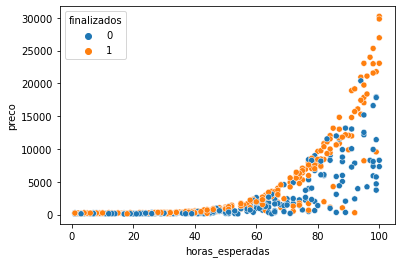

In [8]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [9]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [10]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
eixo_y

array([  100.  ,   401.23,   702.46,  1003.69,  1304.92,  1606.15,
        1907.38,  2208.61,  2509.84,  2811.07,  3112.3 ,  3413.53,
        3714.76,  4015.99,  4317.22,  4618.45,  4919.68,  5220.91,
        5522.14,  5823.37,  6124.6 ,  6425.83,  6727.06,  7028.29,
        7329.52,  7630.75,  7931.98,  8233.21,  8534.44,  8835.67,
        9136.9 ,  9438.13,  9739.36, 10040.59, 10341.82, 10643.05,
       10944.28, 11245.51, 11546.74, 11847.97, 12149.2 , 12450.43,
       12751.66, 13052.89, 13354.12, 13655.35, 13956.58, 14257.81,
       14559.04, 14860.27, 15161.5 , 15462.73, 15763.96, 16065.19,
       16366.42, 16667.65, 16968.88, 17270.11, 17571.34, 17872.57,
       18173.8 , 18475.03, 18776.26, 19077.49, 19378.72, 19679.95,
       19981.18, 20282.41, 20583.64, 20884.87, 21186.1 , 21487.33,
       21788.56, 22089.79, 22391.02, 22692.25, 22993.48, 23294.71,
       23595.94, 23897.17, 24198.4 , 24499.63, 24800.86, 25102.09,
       25403.32, 25704.55, 26005.78, 26307.01, 26608.24, 26909

In [11]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [12]:
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [13]:
yy.ravel()

array([  100.  ,   100.  ,   100.  , ..., 29921.77, 29921.77, 29921.77])

In [14]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [15]:
Z = modelo.predict(pontos)
Z.shape

(10000,)

In [16]:
xx.shape

(100, 100)

In [17]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

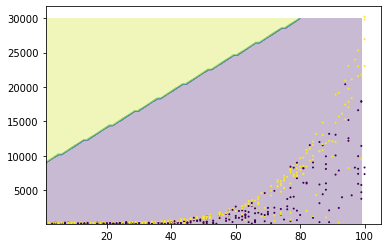

In [18]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)